**Group Members**

1.Pisuttipong Mekdang (6220422083)

2.Wuttipon Assawaniramol (6220422076)

3.Thanisorn Saraphan (6220422060)

# **Load Dependencies**

In [3]:
!pip install pycaret

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\user\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\~ywin32_system32\\pywintypes37.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.



  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68734 sha256=72115ad1413ae

In [2]:
import pandas as pd
from pycaret.clustering import *

ModuleNotFoundError: No module named 'pycaret'

# **Load Data**

In [ ]:
df = pd.read_csv('/content/Supermarket Data.csv')

In [ ]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [ ]:
df.tail(5)

In [ ]:
df.info()

# **Prepare customer single view**

# Calculate features

In [ ]:
from scipy import stats

In [ ]:
##prepare customer single view
df_csv = df_groupby = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalProd=('PROD_CODE', 'nunique'),
                                                                                  SHOP_WEEKDAYS=('SHOP_WEEKDAY',lambda x: stats.mode(x)[0][0]),
                                                                                  SHOP_HOURS = ('SHOP_HOUR',lambda x: stats.mode(x)[0][0]),
                                                                                  BASKET_DOMINANT = ('BASKET_DOMINANT_MISSION',lambda x: stats.mode(x)[0][0])
                                                                                  ).reset_index()

In [ ]:
df_csv

In [ ]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [ ]:
df_csv['BASKET_DOMINANT'].replace({'Grocery':0,'Fresh':1,'Mixed':2,'Nonfood':3,'XX':4},inplace=True)

In [ ]:
#Feature
df_csv.head(5)

# **Cluster customers**

In [ ]:
exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE'], normalize=True)

In [ ]:
models()

In [ ]:
get_metrics()

# Compare model performance

In [ ]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

In [ ]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

# Spectral Clustering Clustering

In [ ]:
sc = create_model('sc')

In [ ]:
plot_model(sc)

# AP

In [ ]:
ap = create_model('ap')

In [ ]:
plot_model(ap)

# KMeans Clustering

In [ ]:
kmeans = create_model('kmeans',num_clusters=5)

In [ ]:
print(kmeans)

In [ ]:
plot_model(kmeans)

In [ ]:
plot_model(kmeans, plot = 'elbow')

In [ ]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [ ]:
kmeans_df = assign_model(kmeans)
kmeans_df

# **Interpret results and plan for actions**

In [ ]:
#Crate data frame
X = kmeans_df.drop(['Cluster','CUST_CODE'],axis=1)
y = kmeans_df.Cluster

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(max_depth = 4,random_state = 0)
model.fit(X,y)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
tree.plot_tree(model,feature_names=X.columns,class_names=model.classes_.astype(str),filled=True)
plt.show()

Conclusion

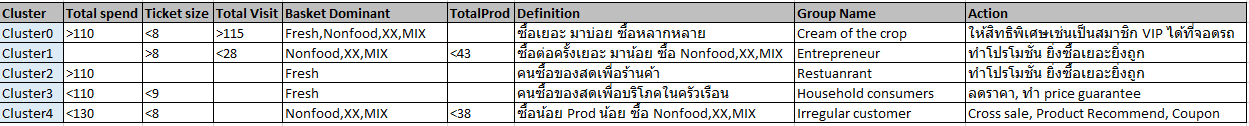